## Chatbots With Langgraph

In [1]:
%pip install langgraph langsmith

   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   -------------------------------------- - 1.8/1.9 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 8.2 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.18.2
    Uninstalling pydantic_core-2.18.2:
      Successfully uninstalled pydantic_core-2.18.2
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.8
    Uninstalling msgpack-1.0.8:
      Successfully uninstalled msgpack-1.0.8
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.9.2
    Uninstalling pydantic-1.9.2:
      Successfully uninstalled pydantic-1.9.2
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.1.88
    Uninstalling langsmith-0.1.88:
      Successfully uninstalled langsmith-0.1.88
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.2.20
    Uninstalling la

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chromadb 0.4.24 requires requests>=2.28, but you have requests 2.27.1 which is incompatible.
chromadb 0.4.24 requires tqdm>=4.65.0, but you have tqdm 4.64.1 which is incompatible.
crewai 0.28.8 requires langchain<0.2.0,>=0.1.10, but you have langchain 0.2.0 which is incompatible.
crewai 0.28.8 requires openai<2.0.0,>=1.13.3, but you have openai 0.10.2 which is incompatible.
crewai-tools 0.2.3 requires beautifulsoup4<5.0.0,>=4.12.3, but you have beautifulsoup4 4.10.0 which is incompatible.
crewai-tools 0.2.3 requires langchain<0.2.0,>=0.1.4, but you have langchain 0.2.0 which is incompatible.
crewai-tools 0.2.3 requires openai<2.0.0,>=1.12.0, but you have openai 0.10.2 which is incompatible.
crewai-tools 0.2.3 requires requests<3.0.0,>=2.31.0, but you have requests 2.27.1 which is incompatible.
embedchain 0.1.102 r

In [2]:
%pip install langchain langchain_groq langchain_community

INFO: pip is looking at multiple versions of langchain-groq to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-community to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------------------- -------- 1.8/2.3 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 10.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 7.9 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.1
    Uninstalling langchain-core-0.3.1:
      Successfully uninstalled langchain-core-0.3.1
  Attempting uninstall: langchain_groq
    Found existing installation: langchain-groq 0.1.3
    Uninstalling langchain-groq-0.1.3:
      Suc

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
crewai 0.28.8 requires langchain<0.2.0,>=0.1.10, but you have langchain 0.2.16 which is incompatible.
crewai 0.28.8 requires openai<2.0.0,>=1.13.3, but you have openai 0.10.2 which is incompatible.
crewai-tools 0.2.3 requires beautifulsoup4<5.0.0,>=4.12.3, but you have beautifulsoup4 4.10.0 which is incompatible.
crewai-tools 0.2.3 requires langchain<0.2.0,>=0.1.4, but you have langchain 0.2.16 which is incompatible.
crewai-tools 0.2.3 requires openai<2.0.0,>=1.12.0, but you have openai 0.10.2 which is incompatible.
crewai-tools 0.2.3 requires requests<3.0.0,>=2.31.0, but you have requests 2.27.1 which is incompatible.
embedchain 0.1.102 requires beautifulsoup4<5.0.0,>=4.12.2, but you have beautifulsoup4 4.10.0 which is incompatible.
embedchain 0.1.102 requires langchain<0.2.0,>=0.1.4, but you have langchain 0.2.1

In [ ]:
from dotenv import load_dotenv
groq_api_key=load_dotenv('groq_api_key')
langsmith=load_dotenv('LANGSMITH_API_KEY')
print(langsmith)


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


In [ ]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"

In [ ]:
from langchain_groq import ChatGroq

In [ ]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7efbfa765330>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7efbfa764670>, model_name='Gemma2-9b-It', groq_api_key=SecretStr('**********'))

## Start Building Chatbot Using Langgraph

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)


In [ ]:
graph_builder

In [ ]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [ ]:
graph_builder.add_node("chatbot",chatbot)

In [ ]:
graph_builder

In [ ]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [ ]:
graph=graph_builder.compile()

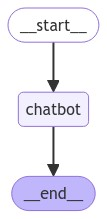

In [ ]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

User: hello
dict_values([{'messages': AIMessage(content='Hello! 👋  How can I help you today? 😊\n', response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 15, 'total_tokens': 30, 'completion_time': 0.028948375, 'prompt_time': 0.00232277, 'queue_time': None, 'total_time': 0.031271145}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-7c991b84-1ff6-461a-baa7-08c8d2767d10-0', usage_metadata={'input_tokens': 15, 'output_tokens': 15, 'total_tokens': 30})}])
content='Hello! 👋  How can I help you today? 😊\n' response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 15, 'total_tokens': 30, 'completion_time': 0.028948375, 'prompt_time': 0.00232277, 'queue_time': None, 'total_time': 0.031271145}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-7c991b84-1ff6-461a-baa7-08c8d2767d10-0' usage_metadata={'input_tokens': 